# Example: Understanding the Secrets of the Yield Curve
Fill me in

## Setup
Set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

In [3]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-3/L3a/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-3/L3a/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-3/L3a`
  No Changes to `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-3/L3a/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-3/L3a/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Installed CodecZlib ────────── v0.7.6
   Installed TranscodingStreams ─ v0.11.2
  No Changes to `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-3/L3a/Pro

## Prerequisite: Load the Treasury Rates Dataset
Fill me in

In [5]:
discount_model = DiscreteCompoundingModel();

Fill me in

In [7]:
par_yield_curve_dataset = CSV.read(joinpath(_PATH_TO_DATA, "UST-Daily-ParYieldCurveRates-08-11-2024.csv"), DataFrame)

Row,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,08/09/2024,5.54,5.4,5.33,5.22,5.02,4.5,4.05,3.86,3.8,3.85,3.94,4.33,4.23
2,08/08/2024,5.55,5.42,5.34,5.21,5.01,4.48,4.04,3.86,3.83,3.89,3.99,4.38,4.28
3,08/07/2024,5.5,5.43,5.34,5.21,4.99,4.45,4.0,3.81,3.79,3.85,3.96,4.35,4.26
4,08/06/2024,5.5,5.43,5.34,5.18,5.0,4.46,3.99,3.76,3.73,3.79,3.9,4.28,4.18
5,08/05/2024,5.52,5.43,5.35,5.14,4.91,4.34,3.89,3.71,3.62,3.66,3.78,4.16,4.06
6,08/02/2024,5.54,5.43,5.29,5.14,4.88,4.33,3.88,3.7,3.62,3.68,3.8,4.19,4.11
7,08/01/2024,5.55,5.46,5.37,5.28,5.08,4.62,4.16,3.96,3.84,3.89,3.99,4.35,4.27
8,07/31/2024,5.49,5.51,5.41,5.32,5.14,4.73,4.29,4.1,3.97,4.0,4.09,4.44,4.35
9,07/30/2024,5.5,5.5,5.4,5.35,5.16,4.78,4.35,4.16,4.03,4.06,4.15,4.5,4.4


## Task 1: Which yield curve should we be looking at?
The [United States Treasury](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics) reports multiple types of interest rate statistics each business day, for example:
* The [Par Yield Curve Rates](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics) is based on the closing market bid prices on the most recently auctioned Treasury securities in the over-the-counter market. The par yields are derived from input market prices, which are indicative quotations obtained by the [Federal Reserve Bank of New York at approximately 3:30 PM each business day](https://www.newyorkfed.org/data-and-statistics). For information on how the Treasury’s yield curve is derived, visit [the Treasury Yield Curve Methodology page](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/treasury-yield-curve-methodology).
* The [Daily Treasury Par Real Yield Curve Rates](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics), which relates the par real yield on a [Treasury Inflation Protected Security (TIPS)](https://www.treasurydirect.gov/marketable-securities/tips/) to its time to maturity, is based on the closing market bid prices on the most recently auctioned TIPS in the over-the-counter market. The par yields are derived from input market prices, which are indicative quotations obtained by the [Federal Reserve Bank of New York at approximately 3:30 PM each business day](https://www.newyorkfed.org/data-and-statistics).
* The [Daily Treasury Bill Rates](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics) are indicative closing market bid quotations on the most recently auctioned Treasury Bills in the over-the-counter market as obtained by the [Federal Reserve Bank of New York at approximately 3:30 PM each business day](https://www.newyorkfed.org/data-and-statistics).

Let's explore [the Par Yield Curve Rates](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics) and try to understand what it is saying.

### TODO: Let's explore the Par-yield curve
When the effective discount rate $\bar{r}$ equals the coupon rate $\bar{c}$, a coupon note (or bond) will trade at it's par value, i.e., $V_{P} = V_{B}$ for all maturities. Let's test this out by constructing [a `MyUSTreasuryCouponSecurityModel` instance](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.MyUSTreasuryCouponSecurityModel) with some typical parameters, and show this claim is valid. Start by setting some typical parameter values:

In [10]:
Vₚ = 100.0; # par value for the note/bond
r̄ = 0.05;
c̄ = 0.05;
T = 1.0; # needs to be 0.5 or greater; see below
λ = 2;

Then construct [a `MyUSTreasuryCouponSecurityModel` instance](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.MyUSTreasuryCouponSecurityModel) by passing the type we want to build, i.e., [`MyUSTreasuryCouponSecurityModel`](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.MyUSTreasuryCouponSecurityModel) and some typical data for the `par` value, the discount `rate,` the `coupon` rate, the duration `T` (years) and the number of compounding events per year `λ = 2` into a [custom `build(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.build-Tuple{Type{MyUSTreasuryCouponSecurityModel},%20NamedTuple}). We save this as the `my_treasury_security_model::MyUSTreasuryCouponSecurityModel` variable.
* We compute (and populate on the model instance) the `price` and other data fields, such as the cashflow table, for the `my_treasury_security_model::MyUSTreasuryCouponSecurityModel` by passing this model to the `discount_model` using the [built-in Julia pipe `|>` operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping).

In [12]:
my_treasury_security_model = build(MyUSTreasuryCouponSecurityModel, (
    par = Vₚ,
    rate = r̄,
    coupon = c̄,
    T = T,
    λ = λ
)) |> discount_model;

Finally, use the [Julia @assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to verify the claim. If the claim is false, i.e., $V_{P} \neq V_{B}$ when $\bar{r} = \bar{c}$, an [`AssertionError` type is thrown](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError). We use the [Julia `issapprox(...)` method to check for equality](https://docs.julialang.org/en/v1/base/math/#Base.isapprox)

In [14]:
@assert isapprox(my_treasury_security_model.price, Vₚ, rtol=1e-4) # checks equality to `rtol` value

### TODO: Cashflow table for the test case

In [16]:
let
    cashflow = my_treasury_security_model.cashflow;
    discount = my_treasury_security_model.discount;
    number_of_periods = length(cashflow)
    bond_data_table = Array{Any,2}(undef, number_of_periods, 5);
    sumvalue = 0.0;
    for i ∈ 0:(number_of_periods - 1)
    
        discount_value = discount[i]
        payment = cashflow[i];
        sumvalue += payment;

        bond_data_table[i+1,1] = i;
        bond_data_table[i+1,2] = discount_value;
        bond_data_table[i+1,3] = discount_value*payment;
        bond_data_table[i+1,4] = payment;
        bond_data_table[i+1,5] = sumvalue;
    end
    pretty_table(bond_data_table; 
        header=["Event", "Discount", "Nominal cashflow events", "Discounted cashflow events", "Discounted cumulative cashflow"], tf = tf_simple)
end

======== ========== ========================= ============================ =================================
  Event   Discount   Nominal cashflow events   Discounted cashflow events   Discounted cumulative cashflow 
======== ========== ========================= ============================ =================================
      0        1.0                    -100.0                       -100.0                           -100.0
      1      1.025                       2.5                      2.43902                          -97.561
      2    1.05062                     102.5                       97.561                              0.0
======== ========== ========================= ============================ =================================


### Check: Treasury Prices from the Par Yield Curve Data
Fill me in

In [18]:
maturity_conversion_dict = Dict{String, Float64}();
basis = 12; # assume a 12-month year
list_of_columns = names(par_yield_curve_dataset)
for column ∈ list_of_columns 
    if (column != "Date")

        # split around the space, and convert to appropriate type
        maturity_fragments = split(column, " "); # split around the space
        duration = maturity_fragments |> first |> string |> x-> parse(Float64, x);
        unit = maturity_fragments |> last;

        # assume: default is years, correct if we have months
        maturity_conversion_dict[column] = duration;
        if (unit == "Mo")
            maturity_conversion_dict[column] = (duration/basis);    
        end
    end
end
maturity_conversion_dict

Dict{String, Float64} with 13 entries:
  "3 Mo"  => 0.25
  "20 Yr" => 20.0
  "30 Yr" => 30.0
  "6 Mo"  => 0.5
  "1 Yr"  => 1.0
  "2 Mo"  => 0.166667
  "10 Yr" => 10.0
  "5 Yr"  => 5.0
  "2 Yr"  => 2.0
  "4 Mo"  => 0.333333
  "1 Mo"  => 0.0833333
  "7 Yr"  => 7.0
  "3 Yr"  => 3.0

In [19]:
number_of_dates = nrow(par_yield_curve_dataset);
number_of_columns = names(par_yield_curve_dataset) |> length
reverse_price_array = Array{Float64,2}(undef, number_of_dates, number_of_columns - 1);
for i ∈ 1:number_of_dates
    for j ∈ 2:number_of_columns

        column = list_of_columns[j];
        r̄ = par_yield_curve_dataset[i, column]*(1/100);
        c̄ = r̄
        my_treasury_security_model.T = column |> key -> maturity_conversion_dict[key];        
        reverse_price_array[i,j-1] = my_treasury_security_model |> discount_model |> model -> model.price
    end
end
reverse_price_array

153×13 Matrix{Float64}:
 99.5842  99.1701  98.7578  100.0  …  100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0  …  100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0  …  100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
 99.5842  99.1701  98.7578  100.0     100.0  100.0  100.0  100.0  100.0
  ⋮                                ⋱    

#### Hmmm. What is going on with the short-range instruments?

## Task 2: Let's compute and analyze our own recession indicator
Fill me in

In [22]:
short_maturity_key = "3 Mo";
long_maturity_key = "30 Yr";
indicator_array = Array{Float64,2}(undef, number_of_dates,3);
for i ∈ 1:number_of_dates
    short_date_yield = par_yield_curve_dataset[i,short_maturity_key]
    long_date_yield = par_yield_curve_dataset[i,long_maturity_key]
    
    indicator_array[i,1] = short_date_yield;
    indicator_array[i,2] = long_date_yield;
    indicator_array[i,3] = long_date_yield - short_date_yield;
end

### Visualize
`Unihide` the code block below to see how we visualized the par yield for the short-term and long-term maturity values specified above. 

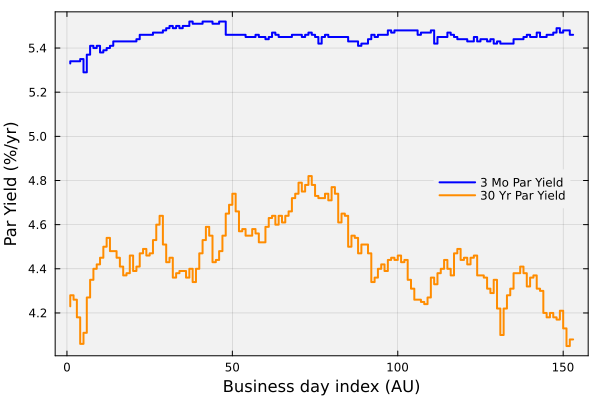

In [24]:
let
    q = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, legend=:right);
    plot(q, indicator_array[:,1], lw=2, c=:blue, label="$(short_maturity_key) Par Yield", linetype=:steppre)
    plot!(indicator_array[:,2], lw=2, c=:darkorange, label="$(long_maturity_key) Par Yield", linetype=:steppre)
    xlabel!("Business day index (AU)", fontsize=18)
    ylabel!("Par Yield (%/yr)", fontsize=18)
end

#### Are the Par Yield Curves inverted?
`Unhide` the code block below to see how we visualized the `indicator_array::Array{Float64}` data for values of the maturity keys specified above.

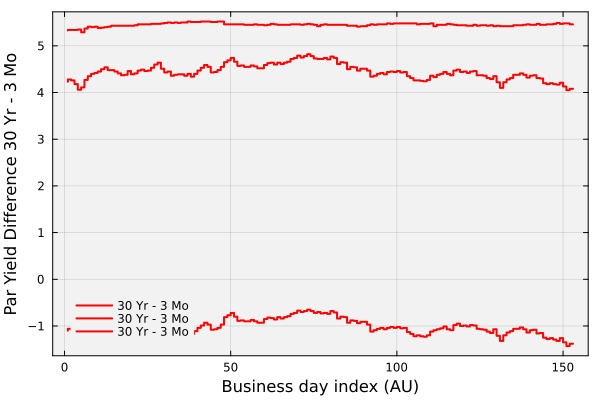

In [40]:
let
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
    plot(p, indicator_array, lw=2, c=:red, label="$(long_maturity_key) - $(short_maturity_key)", linetype=:steppre)
    xlabel!("Business day index (AU)", fontsize=18)
    ylabel!("Par Yield Difference $(long_maturity_key) - $(short_maturity_key)", fontsize=18)
end

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.